In [2]:
!pip install convertdate
!pip install prophet
!pip install plotly
!pip install requests

In [3]:
import requests
import json


res = requests.get('https://opendata.corona.go.jp/api/Covid19JapanAll?dataName=%E6%9D%B1%E4%BA%AC%E9%83%BD')
data = json.loads(res.text)
list = data['itemList']
len(list)

480

In [2]:
import pandas as pd
df = pd.read_json(json.dumps(list))
df.head()

,date,name_jp,npatients
0,2021-08-14,東京都,274837
1,2021-08-13,東京都,269743
2,2021-08-12,東京都,263970
3,2021-08-11,東京都,258981
4,2021-08-10,東京都,254781


In [8]:
from prophet import Prophet

df1 = df.rename(columns={'date': 'ds', 'npatients': 'y'})
m1 = Prophet()
m1.fit(df1)
future1 = m1.make_future_dataframe(periods=90)
forecast1 = m1.predict(future1)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -15.6247
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1465.64    0.00112667       184.878           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1486.97     0.0016229       144.799      0.8066      0.8066      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       1490.82   0.000243105       280.575   4.457e-07       0.001      373  LS failed, Hessian reset 
     299       1491.94   0.000394244       89.7228      0.1576           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14

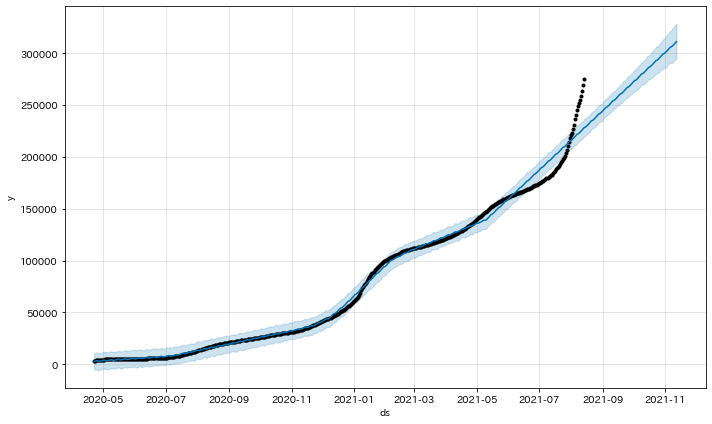

In [9]:
fig1 = m1.plot(forecast1)

In [25]:
m2 = Prophet(changepoint_range=1, changepoint_prior_scale=0.1)
m2.fit(df1)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -15.6247
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1640.56     0.0011648       314.465           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1895.86    0.00488098       1301.96      0.4541           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2034.24    0.00431465        4413.1           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2136.78    0.00304774        2800.1     0.02727           1      449   
    Iter      log prob        ||dx||     

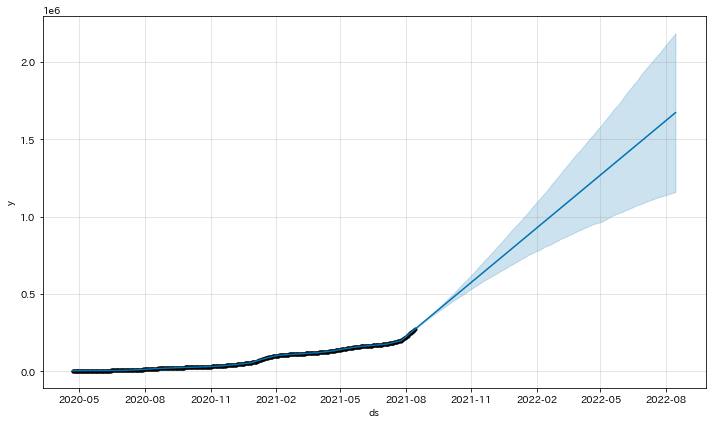

In [26]:
fig2 = m2.plot(forecast2)